# Churn Of Customers

### What is Churn?

Churn (loss of customers to competition) is a problem for telecom companies because it is more expensive to acquire a new customer than to keep your existing one from leaving. 

### Why study customer churn?

Churn is one of the largest problems facing most businesses. According to Harvard Business Review, it costs between 5 times and 25 times as much to find a new customer than to retain an existing one. In other words, your existing customers are worth their weight in gold!

Preventing customer churn is an important business function. It’s also one that has too often been approached with scattershot, back-of-the-envelope methods.

By building a model to predict customer churn with machine learning algorithms, ideally we can nip the problem of unsatisfied customers in the bud  —  and keep the revenue flowing.



## The Business Pain
 
Most telecom companies suffer from voluntary churn. Churn rate has strong impact on the lifetime value of the customer because it affects the length of service and the future revenue of the company. For example if a company has 25% churn rate then the average customer lifetime is 4 years; similarly a company with a churn rate of 50%, has an average customer lifetime of 2 years. It is estimated that 75 percent of the 17 to 20 million subscribers signing up with a new wireless carrier every year are coming from another wireless provider, which means they are churners. Telecom companies spend hundreds of dollars to acquire a new customer and when that customer leaves, the company not only loses the future revenue from that customer but also the resources spend to acquire that customer. Churn erodes profitability.
 
Steps that have been adopted by telecom companies so far:
 
Telecom companies have used two approaches to address churn. 

**(a) Untargeted approach :** The untargeted approach relies on superior product and mass advertising to increase brand loyalty and thus retain customers. 

**(b) Targeted approach :** The targeted approach relies on identifying customers who are likely to churn, and  provide suitable intervention to encourage them to stay.


## What Data we have now

The data set includes information about:

●	Customers who left within the last month – the column is called Churn.

●	Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

●	Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

●	Demographic info about customers – gender, age range, and if they have partners and dependents
Following is the data dictionary 

* **customerID :** Customer ID
* **Gender :** Whether the customer is a male or a female
* **SeniorCitizen :** Whether the customer is a senior citizen or not (1, 0)
* **Partner :** Whether the customer has a partner or not (Yes, No)
* **Dependents :** Whether the customer has dependents or not (Yes, No)
* **Tenure :** Number of months the customer has stayed with the company
* **PhoneService :** Whether the customer has a phone service or not (Yes, No)
* **MultipleLines :** Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetServiceCustomer’s :** internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity :** Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup :** Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection :** Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport :** Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV :** Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies :** Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract :** The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling :** Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod :** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges :** The amount charged to the customer monthly
* **TotalCharges :** The total amount charged to the customer
* **Churn :** Whether the customer churned or not (Yes or No)

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('customers.csv')

In [3]:
#Dimension of a dataframe
df.shape

(7043, 21)

In [4]:
#First 5 rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Data type of all variables
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#Checking for a missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Summary of continuous variables of a dataframe
df.describe(include='number')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#Summary of categorical variables of a dataframe
df.describe(include=np.object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,2144-BFDSO,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
#Removing customerID column
df.drop('customerID', axis=1, inplace=True)

In [10]:
#Replacing our churn output by an integer constants
df.loc[df['Churn'] == 'No', 'Churn'] = 0
df.loc[df['Churn'] == 'Yes', 'Churn'] = 1

In [11]:
#Changing the data type of our target variables
df['Churn'] = df['Churn'].astype('int64')
df['Churn'].dtypes

dtype('int64')

In [12]:
#First 5 rows of the dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


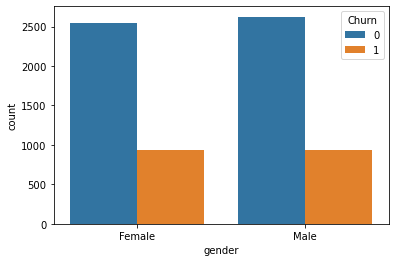

In [13]:
#Countplot of gender based on Churn
sns.countplot(df['gender'], hue=df['Churn'], data=df)

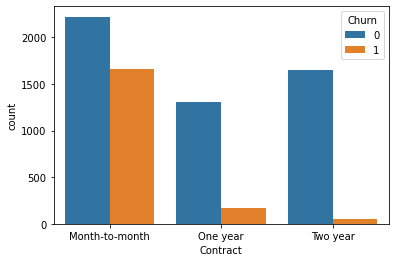

In [14]:
#Countplot of Contract based on Churn
sns.countplot(df['Contract'], hue=df['Churn'], data=df)

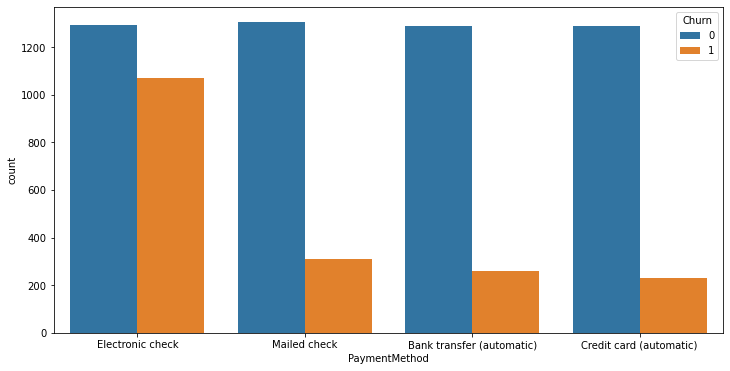

In [15]:
#Countplot of PaymentMethod based on Churn
plt.figure(figsize=(12, 6))
sns.countplot(df['PaymentMethod'], hue=df['Churn'], data=df)

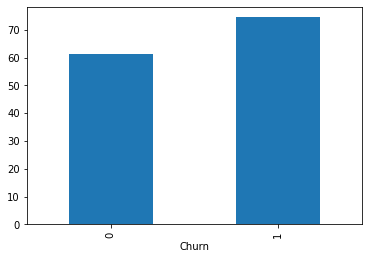

In [16]:
#Barplot of MonthlyCharges based on Churn
df.groupby('Churn')['MonthlyCharges'].mean().plot.bar()

In [17]:
#Separating numerical variables and categorical variables
num_df = df[df.select_dtypes(include=np.number).columns.tolist()]
cat_df = df[df.select_dtypes(include='object').columns.tolist()]

In [18]:
#First 5 rows of numerical dataframe
num_df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [19]:
#First 5 rows of categorical dataframe
cat_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65


In [20]:
#Creating dummy variables for all categorical columns
dummy_df = pd.get_dummies(cat_df.drop('TotalCharges', axis=1))
dummy_df.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [21]:
#Merge numerical dataframe and dummy dataframe
df = pd.concat([num_df, dummy_df], axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [22]:
#Separating dependent variable and Independent variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [23]:
#Creating a Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Implement Random Forest

In [24]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Creating an instance of RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

#Training a model to the Train set
rf.fit(X_train, y_train)

#Make a prediction for Test set
y_pred = rf.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 0]


### Evaluate a Model

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy  : ", accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print("Recall    : ", recall_score(y_test, y_pred))

Accuracy  :  0.7707594038325053
Precision :  0.5819935691318328
Recall    :  0.4839572192513369


We can see that only with 100 trees we got significant increase in Accuracy and Precision, where we compromised on Recall.

### Now let us do tuning by 2 ways
1. Random Search
2. Grid Search

### Random Search

In [26]:
from time import time
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#Utility function to report best_scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank : {0}".format(i))
            print("Mean Validation Score : {0:.3f} (std : {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('Parameters : {0}'.format(results['params'][candidate]))
            print()
            
#Specify parameters and distributions to sample from 
param_dist = {'max_depth' : [3, None],
             'max_features' : randint(1, 11),
             'min_samples_split' : randint(2, 11),
             'bootstrap' : [True, False],
             'criterion' : ['gini', 'entropy']}

#Run RandomizedSearch
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 56.79 seconds for 20 candidates parameter settings.
Model with rank : 1
Mean Validation Score : 0.794 (std : 0.011)
Parameters : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 10}

Model with rank : 2
Mean Validation Score : 0.793 (std : 0.009)
Parameters : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'min_samples_split': 8}

Model with rank : 3
Mean Validation Score : 0.792 (std : 0.010)
Parameters : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 5}



### Grid Search

In [27]:
#Use a full grid over all parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth' : [3, None],
    'max_features' : [1, 3, 5, 10],
    'min_samples_split' : [2, 3, 7, 10],
    'bootstrap' : [True, False],
    'criterion' : ['gini', 'entropy']
}

#Run Grid Search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 309.40 seconds for 128 candidate parameter settings.
Model with rank : 1
Mean Validation Score : 0.800 (std : 0.013)
Parameters : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_split': 7}

Model with rank : 2
Mean Validation Score : 0.800 (std : 0.011)
Parameters : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank : 3
Mean Validation Score : 0.799 (std : 0.014)
Parameters : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_split': 10}



### RandomizedSearchCV took 49.77 seconds for 20 candidates parameter settings.
Mean Validation Score : 0.798 (std : 0.010)<br><br>
Parameters : {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_split': 10}

### GridSearchCV took 291.83 seconds for 128 candidate parameter settings.
Mean Validation Score : 0.800 (std : 0.013)<br><br>
Parameters : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_split': 10}

**Here we have left many paramenters of the grid and we can also tune them.<br><br>
This is how we tune the random forest, now you have to look for a way where you can give your own metrics to run grid search.**
<br><br>We can see that we are now getting 80% Mean Validation Score so its a good model to use.

In [28]:
#Now run the Random Forest with the best parameters of Random Search

#Build a classifier with best of Random Search
rf_random_search = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=None, max_features=8,
                                         min_samples_split=10, criterion='gini')

#Train a model using Training set
rf_random_search.fit(X_train, y_train)

#Make a prediction  
y_pred = rf_random_search.predict(X_test)

In [29]:
#Evaluate a model
print("Accuracy   : ", accuracy_score(y_test, y_pred))
print("Precision  : ", precision_score(y_test, y_pred))
print("Recall     : ", recall_score(y_test, y_pred))

Accuracy   :  0.7963094393186657
Precision  :  0.6454849498327759
Recall     :  0.516042780748663


In [30]:
#Now run the Random Forest with the best parameters of Grid Search

#Build a classifier with best of Grid Search
rf_grid_search = RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini', 
                                       max_features=8, min_samples_split=10)

#Train a model using Training set
rf_grid_search.fit(X_train, y_train)

#Make a prediction 
y_pred = rf_grid_search.predict(X_test)

In [31]:
#Evaluate a model
print("Accuracy   : ", accuracy_score(y_test, y_pred))
print("Precision  : ", precision_score(y_test, y_pred))
print("Recall     : ", recall_score(y_test, y_pred))

Accuracy   :  0.7877927608232789
Precision  :  0.6279863481228669
Recall     :  0.4919786096256685


### Comparing Results of Grid and Random Search

#### Simple Random Forest

Accuracy  :  0.7707594038325053<br>
Precision :  0.5819935691318328<br>
Recall    :  0.4839572192513369

#### Random Search

Accuracy   :  0.796309439318665<br>
Precision  :  0.645484949832775<br>
Recall     :  0.516042780748663

#### Grid Search

Accuracy   :  0.787792760823278<br>
Precision  :  0.627986348122866<br>
Recall     :  0.491978609625668